<a href="https://colab.research.google.com/github/Jatansahu/woc5.0-ml-weather-prediction-case-study-jatan-sahu/blob/main/WOC5_0_ML_Mid_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WOC5.0-ML-EVALUATION**

**WEATHER PREDICTION PROJECT**

**NAME - JATAN SAHU**

**ID-202218061**

**IMPORTING LIBRARIES**

In [176]:
#IMPORTING IMPORTANT LIBRARIES
import numpy as np 
import pandas as pd


In [177]:
#importing important libraries
import matplotlib.pyplot as plt
import seaborn as sb

In [175]:
from sklearn import preprocessing

In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
df = pd.read_csv("/content/drive/MyDrive/PROJECTS/P-4 weather(MSTC)/weather.csv")

**DEFINING DATA**

**QUANTITATIVE DATA**


1.precipitation :- When water falls on the land surface  and open water bodies as rain, sleet, snow, hail, or drizzle.

2.temp_max :- Maximum temperature in a day 

3.temp_min :-Minimum temperature in a day 

4.wind :- Wind speed(km/hr)

**QUALITATIVE DATA**


5.weather :- Types of weather like 'drizzle', 'rain', 'sun', 'snow', 'fog'.

**PART -1**

**UNDERSTANDING DATA **

**1.1 PRINTING DATA**

In [180]:
#Printing values
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


**1.2 DATA SIZE AND DATA SUMMARY**

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [182]:
df.shape
# Total rows and columns

(1461, 5)

**1.3 DATA DESCRIPTION**

In [183]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


**PART 2**
**PROCESSING DATA AND CLEANING DATA**

**2.1 CHECKING NULL VALUES**

In [184]:
#First check NaN values in dataset
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

There are no missing values in dataset

**2.2 CORRELATION MATRIX**

In [185]:
#Checking relation between parameters
df.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


Precipitation & maximum temprature --> Negligible correlated 

Precipitation & minimum temprature --> Negligible correlated

Precipitation & wind               --> Low Positive correlated

Max. & Min. Temparature            -->  Highly correlated

Wind & temp_max                    -->  Negligible correlated

Wind & temp_min                    -->  Negligible correlated 

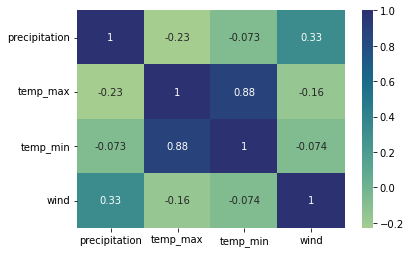

In [186]:
# Plotting heatmap to understand correlation
dataplot = sb.heatmap(df.corr(),annot =True , cmap="crest" )

**PART 3 DATA VISUALIZATION**

In [187]:
df.nunique()

precipitation    111
temp_max          67
temp_min          55
wind              79
weather            5
dtype: int64

In [188]:
df_count=df['weather'].value_counts()

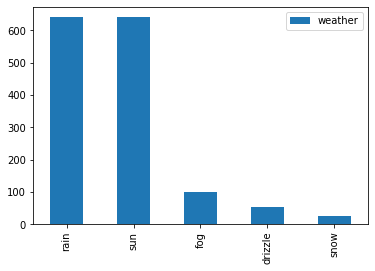

In [189]:
ft = pd.DataFrame(df['weather'].value_counts())
ft.plot(kind='bar')

**PART-4 DATA MODELING**

**4.1 PREPARING DATA FOR MODELING**


precipitation vs weather

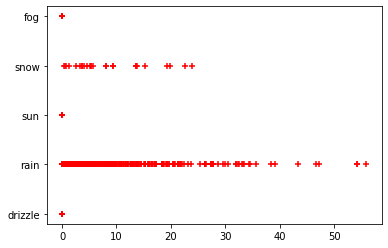

In [190]:
plt.scatter(df['precipitation'],df['weather'],marker="+",color='red')



Using logistic regression

In [191]:
#Encoding weather to numeric 
label_encoder = preprocessing.LabelEncoder()
print(df['weather'].unique())
df['weather'] = label_encoder.fit_transform(df['weather'])
print("After encoding : ",df['weather'].unique())

['drizzle' 'rain' 'sun' 'snow' 'fog']
After encoding :  [0 2 4 3 1]


In [192]:
#DROPPING TARGET 
X=df.drop('weather',axis=1)
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [193]:
y=df['weather']
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64

**4.2 Importing packages for Modeling**

In [194]:
from sklearn.model_selection import train_test_split


In [195]:
from sklearn.linear_model import LogisticRegression

**4.3 Dividing dataset into 2 parts**

TRANING : TESTING = 80:20

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [197]:
len(X_train)

1168

In [198]:
X_train

,precipitation,temp_max,temp_min,wind
339,1.5,8.9,4.4,5.0
1058,1.3,11.7,4.4,3.8
482,0.0,13.9,10.6,5.9
529,0.0,21.1,11.7,2.6
1355,1.8,18.3,12.8,3.8
...,...,...,...,...
1393,8.9,19.4,8.9,3.4
1344,5.3,16.1,11.7,2.4
527,0.0,20.0,10.0,5.7
1149,0.0,12.8,0.6,1.4


In [199]:
len(X_test)

293

In [200]:
X_test

,precipitation,temp_max,temp_min,wind
855,5.1,15.6,9.4,3.8
381,0.0,6.1,-3.9,1.8
721,10.7,10.6,8.3,4.0
577,0.0,21.7,13.3,1.8
35,0.0,13.9,1.7,2.9
...,...,...,...,...
842,14.2,12.2,5.0,4.2
1059,18.3,13.9,9.4,4.5
1014,7.4,18.3,11.7,3.5
387,0.0,3.3,-1.7,0.6


**4.3 DEFINING FUNCTIONS**

In [201]:
lr=LogisticRegression()

In [202]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**4.4  TESTING**

In [203]:
lr.predict(X_test)

array([2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4,
       4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 2])

WHERE,

0- "DRIZZLE"

1- "FOG"

2- "RAIN"

3- "SNOW"

4- "SUN"

**4.5 DEFINING FUNCTION FOR SCORE**

In [204]:
lr.score(X_test,y_test)

0.856655290102389

**THIS MODEL GIVES 85.66% ACCURACY**